### FINA 4380 with Marius Popescu

### The Markowitz Portfolio Optimization and the Efficient Frontier

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import yfinance as yf
import pandas_datareader.data as web

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Global Industry Classification Standard (GICS®)

1. ***Energy Sector*** - comprises companies engaged in exploration & production, refining & marketing, and storage & transportation of oil & gas and coal & consumable fuels. It also includes companies that offer oil & gas equipment and services.

2. ***Materials Sector*** - includes companies that manufacture chemicals, construction materials, glass, paper, forest products and related packaging products, and metals, minerals and mining companies, including producers of steel.

3. ***Industrials Sector*** - includes manufacturers and distributors of capital goods such as aerospace & defense, building products, electrical equipment and machinery and companies that offer construction & engineering services. It also includes providers of commercial & professional services including printing, environmental and facilities services, office services & supplies, security & alarm services, human resource & employment services, research & consulting services. It also includes companies that provide transportation services.

4. ***Consumer Discretionary Sector*** - encompasses those businesses that tend to be the most sensitive to economic cycles. Its manufacturing segment includes automotive, household durable goods, leisure equipment and textiles & apparel. The services segment includes hotels, restaurants and other leisure facilities, media production and services, and consumer retailing and services.

5. ***Consumer Staples Sector*** - comprises companies whose businesses are less sensitive to economic cycles. It includes manufacturers and distributors of food, beverages and tobacco and producers of non-durable household goods and personal products. It also includes food & drug retailing companies as well as hypermarkets and consumer super centers.

6. ***Health Care Sector*** - includes health care providers & services, companies that manufacture and distribute health care equipment & supplies, and health care technology companies. It also includes companies involved in the research, development, production and marketing of pharmaceuticals and biotechnology products.

7. ***Financials Sector*** - contains companies involved in banking, thrifts & mortgage finance, specialized finance, consumer finance, asset management and custody banks, investment banking and brokerage and insurance. It also includes Financial Exchanges & Data and Mortgage REITs.

8. ***Information Technology Sector*** - comprises companies that offer software and information technology services, manufacturers and distributors of technology hardware & equipment such as communications equipment, cellular phones, computers & peripherals, electronic equipment and related instruments, and semiconductors.

9. ***Communication Services Sector*** - includes companies that facilitate communication and offer related content and information through various mediums. It includes telecom and media & entertainment companies including producers of interactive gaming products and companies engaged in content and information creation or distribution through proprietary platforms.

10. ***Utilities Sector*** - comprises utility companies such as electric, gas and water utilities. It also includes independent power producers & energy traders and companies that engage in generation and distribution of electricity using renewable sources.

11. ***Real Estate Sector*** - contains companies engaged in real estate development and operation. It also includes companies offering real estate related services and Equity Real Estate Investment Trusts (REITs).

#### Selected ETFs - Vanguard

1. ***Energy*** - VDE
2. ***Materials*** - VAW
3. ***Industrials*** - VIS
4. ***Consumer Discretionary*** - VCR
5. ***Consumer Staples*** - VDC
6. ***Health Care*** - VHT
7. ***Financials*** - VFH
8. ***Information Technology*** - VGT
9. ***Communication Services*** - VOX
10. ***Utilities*** - VPU
11. ***Real Estate*** - VNQ

In [10]:
start = dt.datetime(2017,1,1)
end = dt.datetime.now()

ticker_list= ['VDE','VAW', 'VIS', 'VCR', 'VDC','VHT', 'VFH', 'VGT', 'VOX', 'VPU', 'VNQ']

returns = yf.download(ticker_list,start-pd.offsets.BDay(1),end)['Adj Close'].pct_change().dropna()

#returns.columns=[i+'_RET' for i in np.sort(ticker_list)]

[*********************100%***********************]  11 of 11 completed


In [11]:
returns.head()

,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU
Date,,,,,,,,,,,
2017-01-03,0.008093,0.004507,0.003284,0.011750,0.007582,0.007901,0.012385,0.006540,0.003272,0.032651,-0.003925
2017-01-04,0.017027,0.014546,0.001562,-0.000283,0.011204,0.006043,0.009740,0.006831,0.014613,0.006865,0.004879
2017-01-05,-0.003643,-0.000839,0.001783,-0.002739,-0.010914,0.000731,0.004321,-0.005295,0.003214,-0.007299,0.000000
2017-01-06,-0.002264,0.001985,-0.000371,-0.000284,0.004013,0.009165,0.003074,0.003078,0.000119,-0.013834,0.002894
2017-01-09,-0.002530,-0.000838,-0.006675,-0.015820,-0.008493,0.001768,0.007583,-0.007132,-0.009017,-0.009711,-0.013685


In [12]:
returns.tail()

,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU
Date,,,,,,,,,,,
2023-03-27,0.007249,0.002842,0.006244,0.022501,0.015744,-0.006265,0.005174,0.007944,-0.001142,-0.004241,0.000908
2023-03-28,0.006144,0.000500,0.001788,0.015277,0.000525,-0.004302,-0.005828,0.005436,-0.002414,-0.008944,0.003350
2023-03-29,0.013085,0.017827,0.005670,0.014420,0.014704,0.020435,0.004107,0.013191,0.022163,0.013537,0.014052
2023-03-30,0.005568,0.008389,0.002923,0.002649,-0.003623,0.010093,0.004346,0.002828,0.013084,0.003922,0.004047
2023-03-31,0.015128,0.024918,0.007235,0.005900,0.011427,0.016240,0.011710,0.013675,0.021402,0.020695,0.007926


In [13]:
returns_mon = returns.resample(rule = 'M').apply(lambda x: x.add(1).prod().sub(1))
returns_mon.tail()

,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU
Date,,,,,,,,,,,
2022-11-30,0.111398,0.024098,0.061875,0.013097,0.061332,0.053725,0.046579,0.072276,0.061461,0.051379,0.070399
2022-12-31,-0.053502,-0.108901,-0.033105,-0.038832,-0.059349,-0.079666,-0.021019,-0.038505,-0.050343,-0.071744,-0.009432
2023-01-31,0.097121,0.154780,-0.001618,0.029683,0.078327,0.096960,-0.007942,0.055683,0.104025,0.150152,-0.015780
2023-02-28,-0.028651,-0.021904,-0.022273,-0.066304,-0.020738,0.004966,-0.046001,-0.005031,-0.058643,-0.040698,-0.057440
2023-03-31,-0.015649,0.023859,0.039559,-0.011098,-0.103215,0.096988,0.019098,-0.003629,-0.021555,0.068667,0.045451


In [17]:
rf = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0][['RF']].div(100)

rf.index = rf.index.to_timestamp(how='end').normalize()

rf.tail()

,RF
Date,
2022-10-31,0.0023
2022-11-30,0.0029
2022-12-31,0.0033
2023-01-31,0.0035
2023-02-28,0.0034


In [20]:
# Keep only the months that we have RF data from Ken French
returns_mon = returns_mon[returns_mon.index<=rf.index[-1]]
returns_mon.tail()

,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU
Date,,,,,,,,,,,
2022-10-31,0.095944,0.023865,0.094127,0.240205,0.121440,0.074275,0.086410,0.129427,0.035051,0.025495,0.024462
2022-11-30,0.111398,0.024098,0.061875,0.013097,0.061332,0.053725,0.046579,0.072276,0.061461,0.051379,0.070399
2022-12-31,-0.053502,-0.108901,-0.033105,-0.038832,-0.059349,-0.079666,-0.021019,-0.038505,-0.050343,-0.071744,-0.009432
2023-01-31,0.097121,0.154780,-0.001618,0.029683,0.078327,0.096960,-0.007942,0.055683,0.104025,0.150152,-0.015780
2023-02-28,-0.028651,-0.021904,-0.022273,-0.066304,-0.020738,0.004966,-0.046001,-0.005031,-0.058643,-0.040698,-0.057440


### 1. Portfolio Optimization using Mathematical Function Optimization

We will be maximizing the functional form of the Sharpe Ratio (or, specifically, minimize the negative of the Sharpe Ratio), by using the SciPy minimizing function.

In [21]:
from scipy.optimize import minimize

In [22]:
#help(minimize)

In [26]:
# Define the portfolio returns function
def port_ret(weights):
    port_ret = np.dot(returns_mon*12,weights).mean()
    return port_ret

# Define the portfolio standard deviation function
def port_std(weights):
    port_std = np.sqrt(np.dot(weights, np.dot(returns_mon.cov()*12, weights)))
    return port_std

# Define the excess portfolio returns function
def ex_port_ret(weights):
    ex_port_ret = (np.dot(returns_mon,weights) - rf['RF']).mean()*12
    return ex_port_ret

# Define the excess portfolio standard deviation function
def ex_port_std(weights):
    ex_port_std = (np.dot(returns_mon,weights) - rf['RF']).std()*np.sqrt(12)
    return ex_port_std

# Define the negative Sharpe Ratio function that we will minimize
def neg_SR(weights):
    SR = ex_port_ret(weights) / ex_port_std(weights)
    return (-1)*SR

In [27]:
# By convention of minimize function it should be a function that returns zero for conditions
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1})

# Weights must be between 0 and 1
boundaries=[(0,1)]
bounds = tuple(boundaries * len(returns_mon.columns))

# Initial Guess (equally weighted)
init_guess = np.full(len(returns_mon.columns), 1/len(returns_mon.columns))

#### A. Scenario with short-selling constraints

In [28]:
# Optimal Portfolio (OP)
optimal_port = minimize(neg_SR,init_guess,bounds = bounds,constraints=constraints)
optimal_port

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9284613825754724
       x: [ 0.000e+00  2.848e-16  9.354e-16  1.119e-16  0.000e+00
            7.241e-01  2.050e-01  0.000e+00  0.000e+00  1.497e-16
            7.089e-02]
     nit: 8
     jac: [ 2.266e-01  2.832e-01 -1.502e-02  2.846e-01  2.371e-01
           -6.678e-02 -6.704e-02  2.646e-01  3.687e-01  7.187e-01
           -6.789e-02]
    nfev: 97
    njev: 8

In [29]:
# Maximum Sharpe Ratio
-optimal_port.fun

0.9284613825754724

In [30]:
# Weights of the assets in the optimal portfolio
for ticker in ticker_list:
    print(ticker + "  "+ str(round(optimal_port.x[ticker_list.index(ticker)],4)),end="  ")

VDE  0.0  VAW  0.0  VIS  0.0  VCR  0.0  VDC  0.0  VHT  0.7241  VFH  0.205  VGT  0.0  VOX  0.0  VPU  0.0  VNQ  0.0709  

In [31]:
# Return of the optimal portfolio
port_ret(optimal_port.x)

0.18121457528172225

In [32]:
# Standard Deviation of the optimal portfolio
port_std(optimal_port.x)

0.1820484793822395

In [33]:
# Global Minimum Variance Portfolio (GMVP)
gmvp_port = minimize(port_std,init_guess,bounds = bounds,constraints=constraints)
gmvp_port

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.12668565149713606
       x: [ 4.969e-18  0.000e+00  4.487e-01  0.000e+00  2.340e-17
            0.000e+00  2.577e-01  0.000e+00  2.895e-17  0.000e+00
            2.936e-01]
     nit: 12
     jac: [ 1.649e-01  1.593e-01  1.267e-01  1.728e-01  1.471e-01
            1.440e-01  1.267e-01  1.630e-01  1.487e-01  1.317e-01
            1.267e-01]
    nfev: 144
    njev: 12

In [34]:
# Return of GMVP
port_ret(gmvp_port.x)

0.09802720820731116

In [35]:
# Standard Deviation of GMVP
port_std(gmvp_port.x)

0.12668565149713606

In [36]:
# Weights of the assets in the GMVP
for ticker in ticker_list:
    print(ticker + "  "+ str(round(gmvp_port.x[ticker_list.index(ticker)],4)),end="  ")

VDE  0.0  VAW  0.0  VIS  0.4487  VCR  0.0  VDC  0.0  VHT  0.0  VFH  0.2577  VGT  0.0  VOX  0.0  VPU  0.0  VNQ  0.2936  

#### B. Scenario with No short-selling constraints

In [37]:
# Optimal Portfolio (OP)
optimal_port = minimize(neg_SR,init_guess,#bounds = bounds,
                        constraints=constraints)
optimal_port

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.7157882869565422
       x: [-1.251e-01  2.314e-01  5.525e-01  1.156e-01  1.271e+00
            2.208e+00  6.948e-01 -1.663e+00 -3.082e-01 -2.369e+00
            3.921e-01]
     nit: 24
     jac: [-4.232e-02 -4.233e-02 -4.259e-02 -4.316e-02 -4.253e-02
           -4.213e-02 -4.267e-02 -4.252e-02 -4.252e-02 -4.238e-02
           -4.224e-02]
    nfev: 289
    njev: 24

In [38]:
# Maximum Sharpe Ratio
-optimal_port.fun

1.7157882869565422

In [39]:
# Weights of the assets in the optimal portfolio
for ticker in ticker_list:
    print(ticker + "  "+ str(round(optimal_port.x[ticker_list.index(ticker)],4)),end="  ")

VDE  -0.1251  VAW  0.2314  VIS  0.5525  VCR  0.1156  VDC  1.271  VHT  2.208  VFH  0.6948  VGT  -1.6631  VOX  -0.3082  VPU  -2.3689  VNQ  0.3921  

In [40]:
# Return of the optimal portfolio
port_ret(optimal_port.x)

0.5401778662032499

In [41]:
# Standard Deviation of the optimal portfolio
port_std(optimal_port.x)

0.307285904780694

In [42]:
# Global Minimum Variance Portfolio (GMVP)
gmvp_port = minimize(port_std,init_guess,#bounds = bounds,
                     constraints=constraints)
gmvp_port

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.11512628272051734
       x: [-2.254e-01 -1.086e-01  6.122e-01 -1.371e-02  2.479e-01
            9.472e-02  4.096e-01 -3.793e-01 -1.434e-01  1.934e-01
            3.127e-01]
     nit: 25
     jac: [ 1.155e-01  1.157e-01  1.153e-01  1.157e-01  1.156e-01
            1.154e-01  1.152e-01  1.156e-01  1.154e-01  1.156e-01
            1.152e-01]
    nfev: 301
    njev: 25

In [43]:
# Return of GMVP
gmvp_ret = port_ret(gmvp_port.x)
gmvp_ret

0.08685518031095892

In [44]:
# Standard Deviation of GMVP
gmvp_std = port_std(gmvp_port.x)
gmvp_std

0.11512628272051734

In [45]:
# Weights of the assets in the GMVP
for ticker in ticker_list:
    print(ticker + "  "+ str(round(gmvp_port.x[ticker_list.index(ticker)],4)),end="  ")

VDE  -0.2254  VAW  -0.1086  VIS  0.6122  VCR  -0.0137  VDC  0.2479  VHT  0.0947  VFH  0.4096  VGT  -0.3793  VOX  -0.1434  VPU  0.1934  VNQ  0.3127  

### 2. The Efficient Frontier

#### Scenario with No Short-Selling constraints

We will create the efficient frontier by minimizing the portfolio standard deviation for a range of portfolio returns.

In [46]:
# Create an array of equally-spaced numbers that will represent our portfolio returns
frontier_y = np.arange(gmvp_ret,port_ret(optimal_port.x)+port_ret(optimal_port.x)*0.5,0.01)

In [47]:
frontier_x = []

for ret in frontier_y:
    constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1},
                {'type':'eq','fun': lambda weights: port_ret(weights) - ret})
    
    init_guess = np.full(len(returns_mon.columns),1/len(returns_mon.columns))
    
    boundaries=[(0,1)]
    bounds = tuple(boundaries * len(returns_mon.columns))
    
    result = minimize(port_std,init_guess,#bounds=bounds,
                      constraints=constraints)
    
    frontier_x.append(result.fun)

frontier_x=np.array(frontier_x)

In [48]:
#frontier_x

In [49]:
#frontier_y

In [55]:
# Download Data for the Vanguard S&P 500 ETF - ticker 'VOO'
return_voo = yf.download('VOO',start-pd.offsets.BDay(1),end)[['Adj Close']].pct_change().dropna().resample('M').apply(lambda x:x.add(1).prod().sub(1))
return_voo.columns = ['VOO']

# Keep only the months that we have RF data from Ken French
return_voo = return_voo[return_voo.index<=rf.index[-1]]

return_voo.head()

[*********************100%***********************]  1 of 1 completed


,VOO
Date,
2017-01-31,0.017827
2017-02-28,0.038761
2017-03-31,0.001319
2017-04-30,0.010400
2017-05-31,0.014044


In [56]:
print('This is Vanguard S&P 500 ETF average return:')
VOO_Mean=return_voo.mean()*12
print(VOO_Mean[0],'\n')

print('This is Vanguard S&P 500 ETF standard deviation:')
VOO_Std=return_voo.std()*np.sqrt(12)
print(VOO_Std[0],'\n')

print('This is Vanguard S&P 500 ETF Sharpe Ratio:')
VOO_SR = ((return_voo['VOO'] - rf['RF']).mean()*12)/((return_voo['VOO'] - rf['RF']).std()*np.sqrt(12))
print(VOO_SR)

This is Vanguard S&P 500 ETF average return:
0.12525865897202082 

This is Vanguard S&P 500 ETF standard deviation:
0.17051510128807656 

This is Vanguard S&P 500 ETF Sharpe Ratio:
0.6634146216417484


### Plotting the data

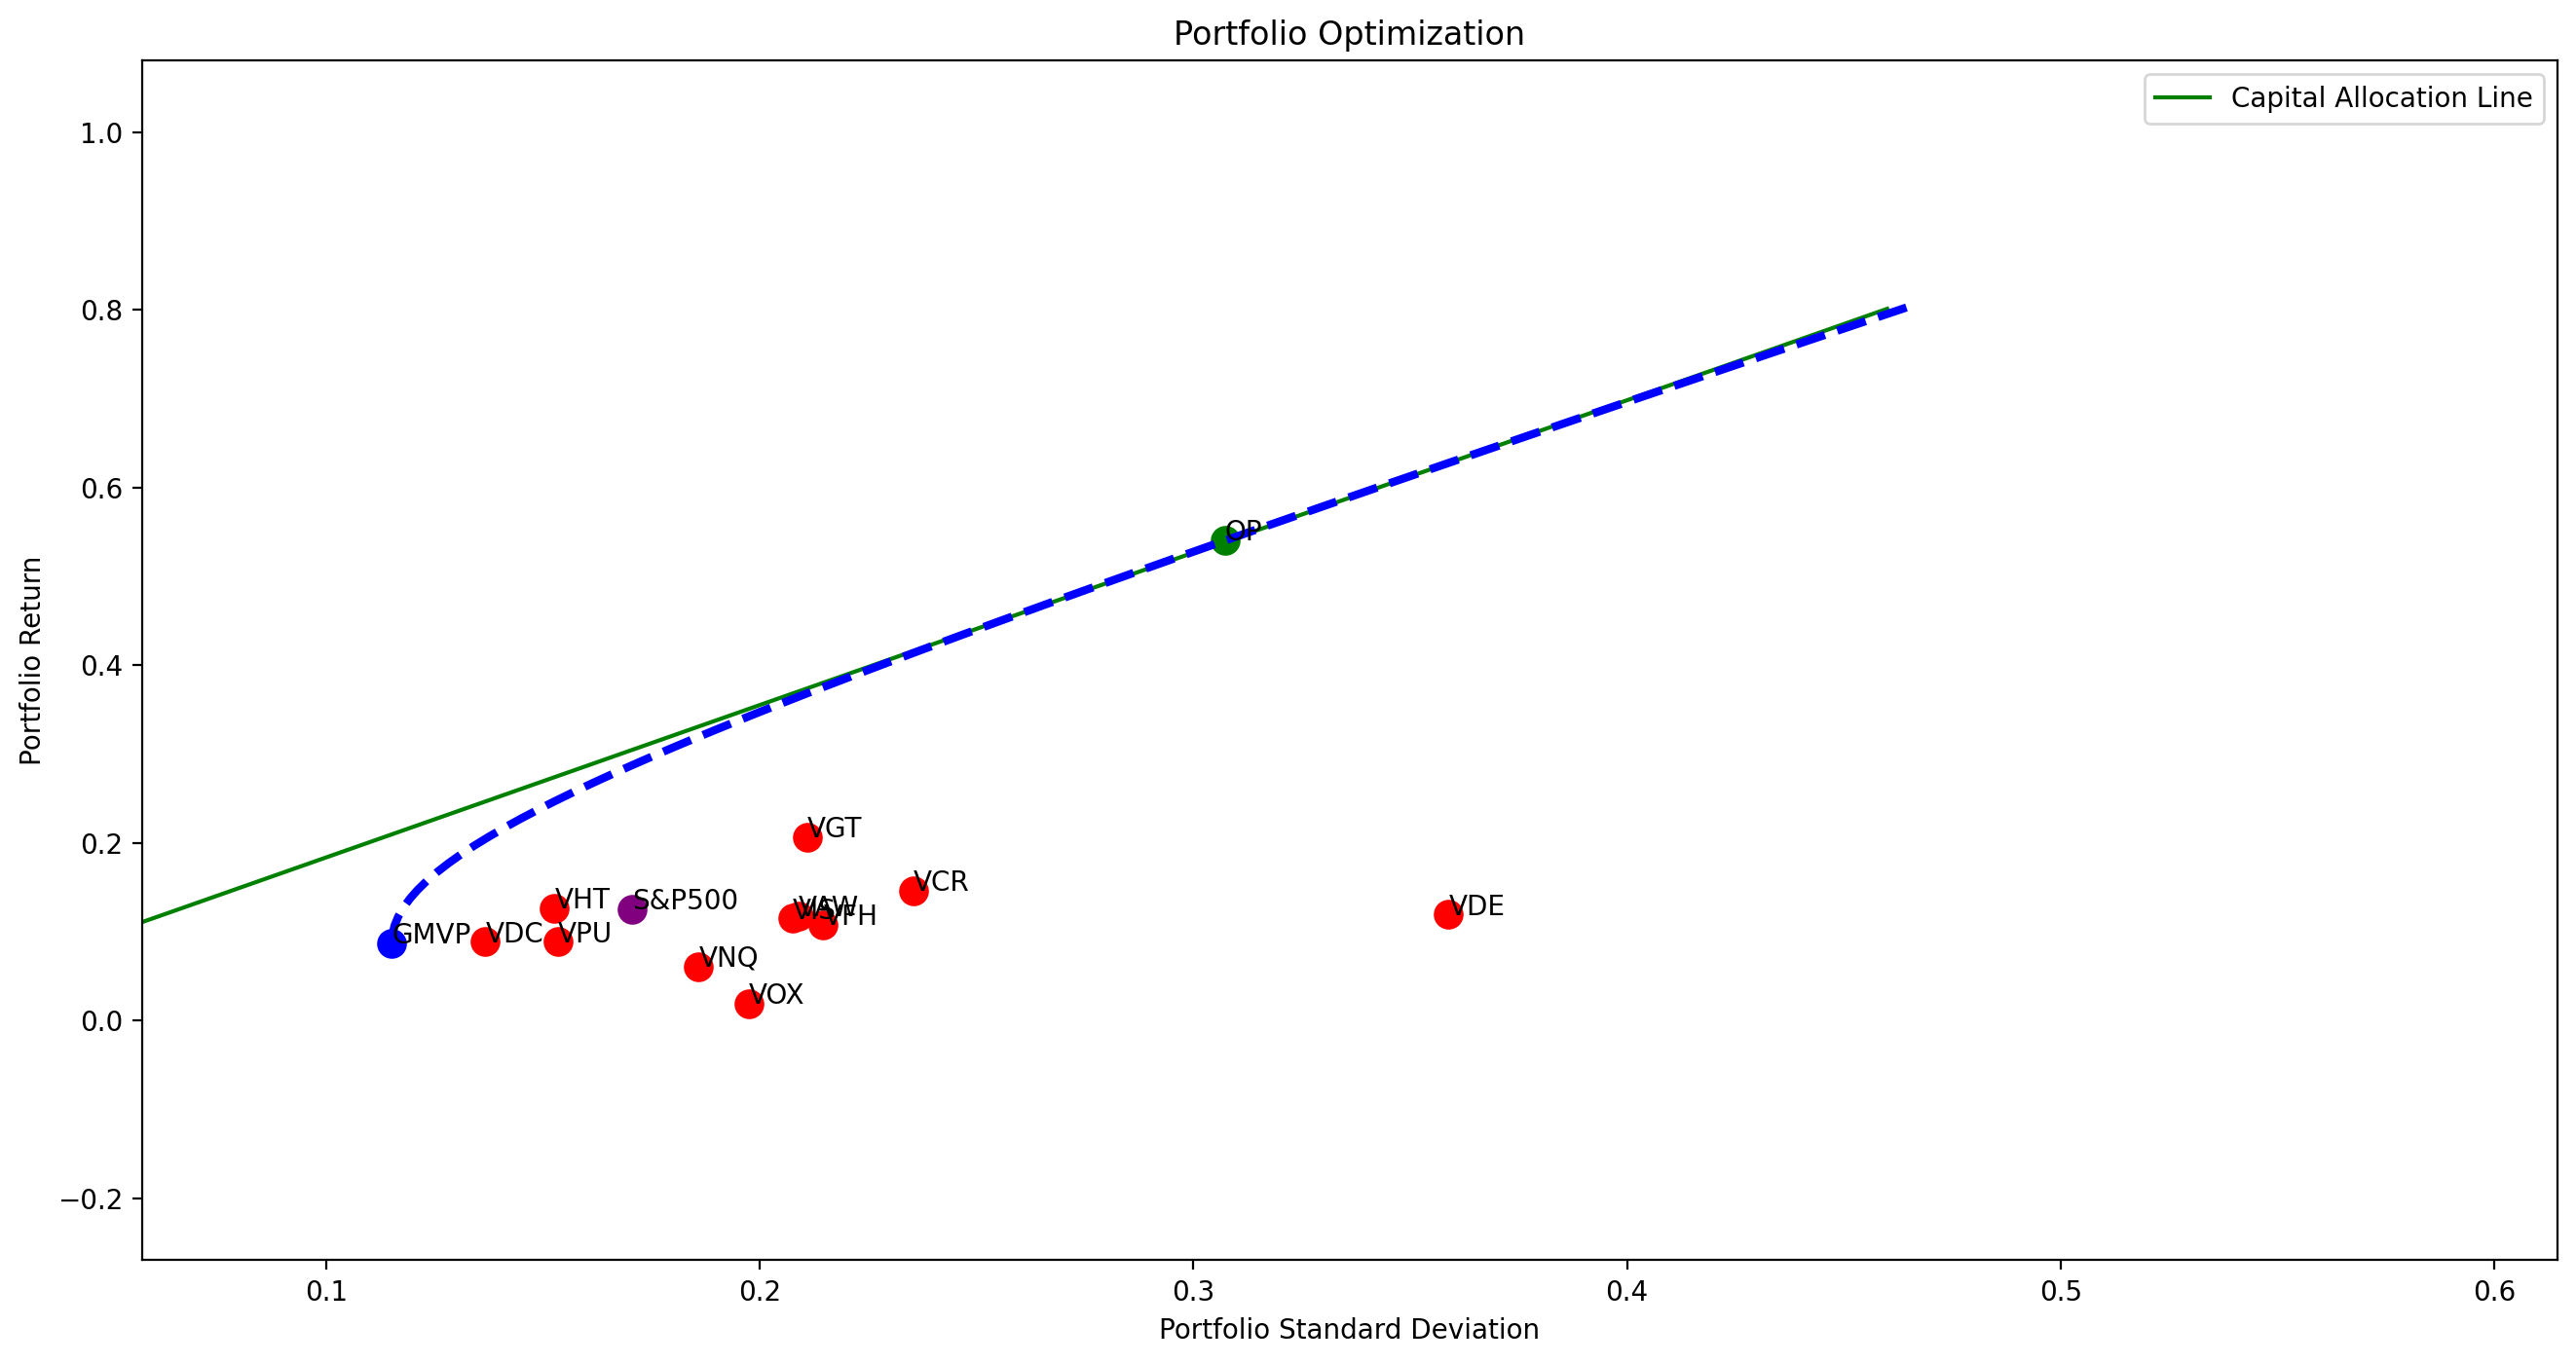

In [58]:
fig, ax = plt.subplots(figsize=(16,8))

# Add limits to the axes
ax.set_xlim(gmvp_std*0.5,port_std(optimal_port.x)*2)
ax.set_ylim(-port_ret(optimal_port.x)*0.5,port_ret(optimal_port.x)*2)

# Add a green dot for the portfolio with the maximum Sharpe Ratio (Optimal Risky Portfolio)
ax.scatter(port_std(optimal_port.x),port_ret(optimal_port.x),color='green',s=100)
ax.annotate('OP',(port_std(optimal_port.x),port_ret(optimal_port.x)))

# Add a purple dot for the VOO ETF
ax.scatter(VOO_Std[0],VOO_Mean[0],color='purple',s=100)
ax.annotate('S&P500',(VOO_Std[0],VOO_Mean[0]))

# Add a blue dot for the portfolio with the minimum variance (Global Mimimum Variance Portfolio)
ax.scatter(gmvp_std,gmvp_ret,color='blue',s=100)
ax.annotate('GMVP',(gmvp_std,gmvp_ret))

# Draw the Capital Allocation Line (CAL)
ax.plot(np.arange(0.0,frontier_x[-1],0.01),
        (rf['RF'].mean()*12)+(-optimal_port.fun)*np.arange(0.0,frontier_x[-1],0.01),
        color='green',
       label = 'Capital Allocation Line')

# Annotate the stocks on the plot
for ticker in ticker_list:
    ax.annotate(ticker,(returns_mon[ticker].std()*np.sqrt(12),returns_mon[ticker].mean()*12))
    ax.scatter(returns_mon[ticker].std()*np.sqrt(12),returns_mon[ticker].mean()*12,color='red',s=100)
    
# Add frontier line
ax.plot(frontier_x,frontier_y,color = 'blue', linestyle='--',linewidth=3)

# Add title to the plot
ax.set_title('Portfolio Optimization')

# Add axis labels
ax.set_xlabel('Portfolio Standard Deviation')
ax.set_ylabel('Portfolio Return');

# Add legend to the graph
ax.legend(loc = 'best');